In [ ]:
# Importing Tensorflow and keras
#Keras is built into TF 2.0

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

np.random.seed(2)

import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

#Setting the Theme of the data visualizer Seaborn
sns.set(style="dark",context="notebook",palette="muted")

#Tensorflow Version
print("TensorFlow Version:   "+tf.version.VERSION)
print("Keras Version:   "+tf.keras.__version__)

2022-12-09 16:43:22.615164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 16:43:22.795457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-09 16:43:22.795500: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-09 16:43:22.836849: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-09 16:43:25.140319: W tensorflow/stream_executor/pla

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
# train = pd.read_csv("train.csv")
# test = pd.read_csv("test.csv")

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
def threed_to_twod(data):
    return data.reshape(data.shape[0], data.shape[1]*data.shape[2])

In [ ]:
#Converting form 3D to 2D
X_train = threed_to_twod(X_train)
X_test = threed_to_twod(X_test)

Text(0.5, 1.0, 'distribution of testing labels')

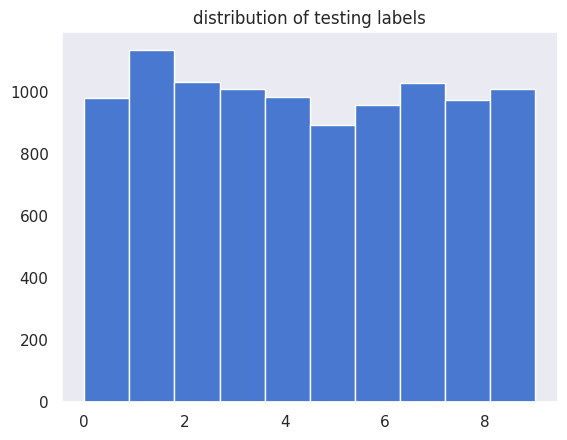

In [ ]:
plt.hist(y_test)
plt.title('distribution of testing labels')

Text(0, 0.5, 'Count')

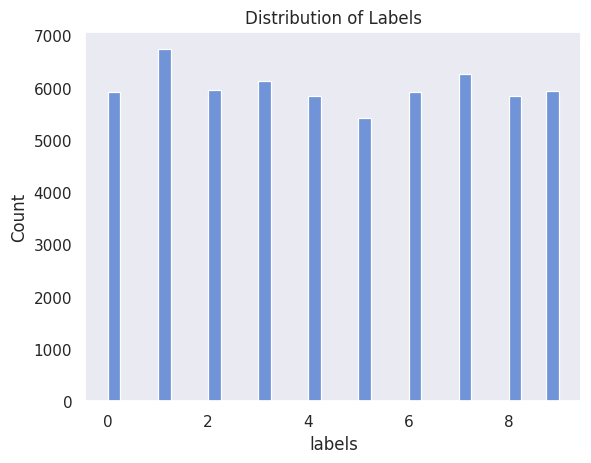

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.histplot(y_train).get_figure()

plt.title("Distribution of Labels")
plt.xlabel("labels")
plt.ylabel("Count") 



In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/tmp/ipykernel_78/3190433108.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot( y_train, palette = 'icefire')


Text(0.5, 1.0, 'NUmber of digit classes')

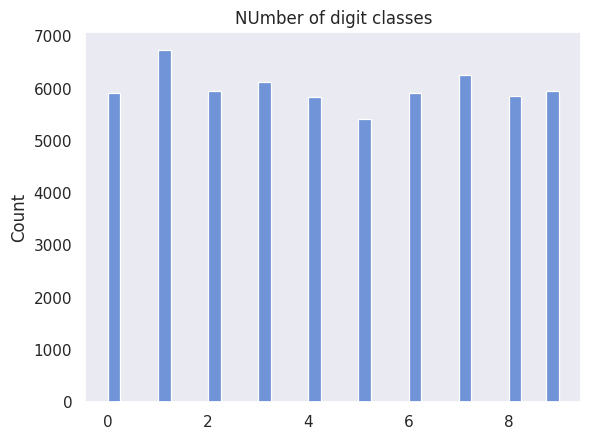

In [ ]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.histplot( y_train, palette = 'icefire')
plt.title('NUmber of digit classes')


Text(0.5, 1.0, 'Digit 3')

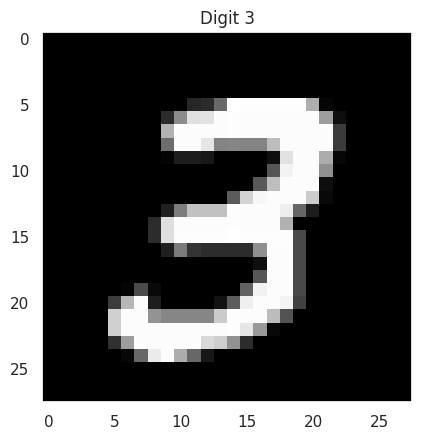

In [ ]:
# Plotting some samples as well as converting into matrix

three = X_train[7]
three.shape
three = three.reshape(28,28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

Text(0.5, 1.0, 'Digit 9')

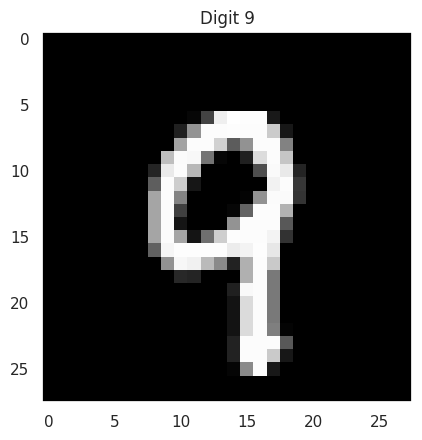

In [ ]:
nine = X_train[350]
nine.shape
nine = nine.reshape(28, 28)
plt.imshow(nine, cmap='gray')
plt.title("Digit 9")

In [ ]:
len(X_test)

10000

In [ ]:
len(X_train)

60000

In [ ]:
# scaling the features
from sklearn.preprocessing import scale
# X_scaled = scale(X)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)


# train test split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# linear model
model_linear = SVC(kernel='linear')

start_time = time.time()
model_linear.fit(X_train_scaled, y_train)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

# predict
start_time = time.time()
y_pred = model_linear.predict(X_test_scaled)
elapsed_time = time.time() - start_time
print("Time consumed to test model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

Time consumed to fit model:  00:08:07
Time consumed to test model:  00:01:00


In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.928 

[[ 953    0    6    2    1    8    6    2    1    1]
 [   0 1118    7    2    0    1    2    1    4    0]
 [   9   12  956   11    9    4    5    5   18    3]
 [   7    1   15  940    0   17    1    6   19    4]
 [   3    2   18    1  927    0    3    6    3   19]
 [   7    6    7   40    5  791   12    1   20    3]
 [  14    3   17    1    9   19  892    0    3    0]
 [   2    8   23   14   11    2    0  945    2   21]
 [  11    7   10   29    8   23    8    6  860   12]
 [   9    7    6   11   38    5    0   23   12  898]]


In [ ]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)


In [ ]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9792 

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [ ]:
from sklearn import svm


In [ ]:
# Training it on a sample
#You can change the value i to use the desired number of samples.
i=5000;
score=[]
fittime=[]
scoretime=[]
clf = svm.SVC(random_state=42)

In [ ]:
parameters = {'gamma': [1, 0.1, 0.01, 0.001,0.001],
             'C': [1000, 100, 10, 5,1],'kernel':['rbf','linear']} 

p = GridSearchCV(clf , param_grid=parameters, cv=3)

In [ ]:
X=X_train[:i]
y=y_train[:i]
start_time = time.time()
p.fit(X,y)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

In [ ]:
# creating a KFold object with 5 splits 

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1,5,10],'kernel':['rbf','linear']}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        verbose = 1,cv=1
                        )      

# fit the model
model_cv.fit(X_train, y_train)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.514305,0.178202,8.046305,0.068436,5,0.01,"{'C': 5, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,5.166184,0.024793,3.873780,0.130824,5,0.001,"{'C': 5, 'gamma': 0.001}",0.936310,0.945238,0.946429,...,0.944524,0.004508,2,0.996875,0.996577,0.996429,0.996875,0.996280,0.996607,0.000238
2,4.652200,0.016152,3.869301,0.128191,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.914286,0.925595,0.922024,...,0.922976,0.007169,4,0.950446,0.950893,0.950000,0.947768,0.947619,0.949345,0.001379
3,25.322271,0.197791,7.999078,0.101392,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,5.132585,0.049557,3.736726,0.117253,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933929,0.945238,0.947024,...,0.944881,0.005815,1,0.999405,0.999405,0.999405,0.999405,0.999405,0.999405,0.000000
5,3.898112,0.026584,3.321047,0.084882,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.911310,0.928571,0.927976,...,0.926071,0.009278,3,0.963542,0.964137,0.963839,0.961607,0.959524,0.962530,0.001744


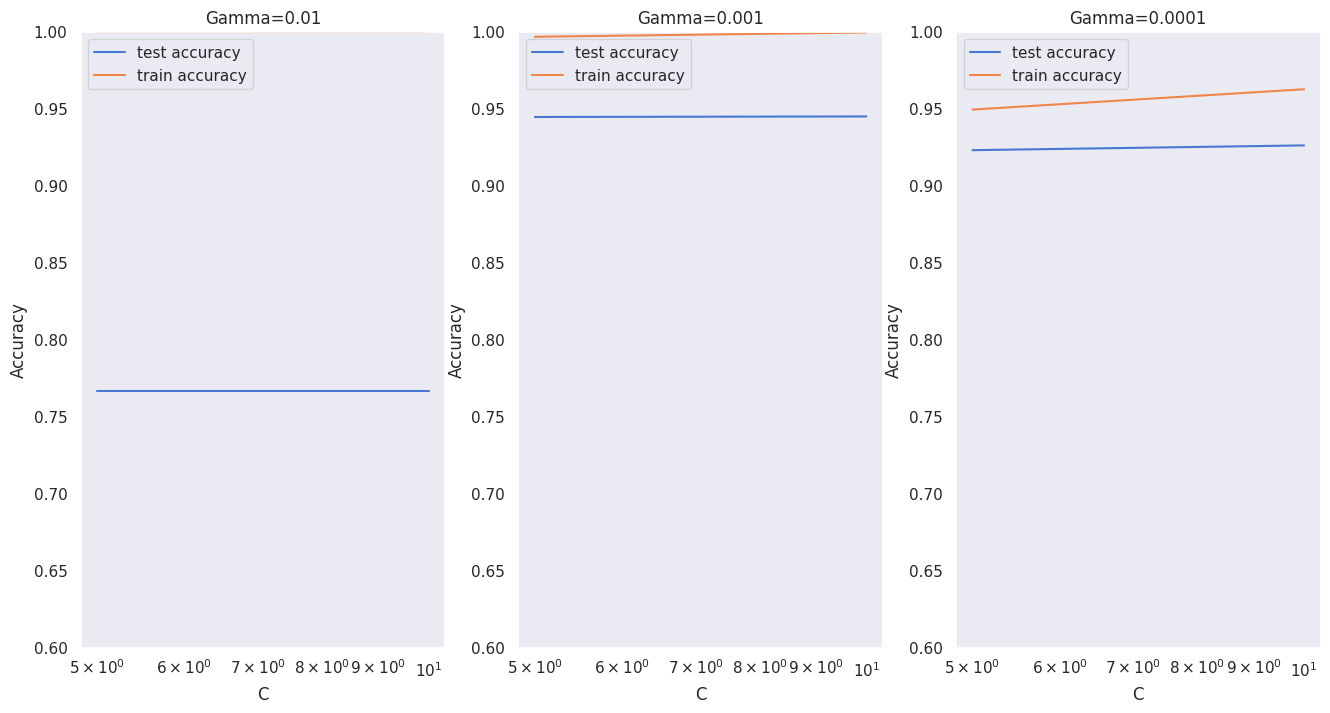

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9448809523809523 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [ ]:
# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

start_time = time.time()
model.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))


start_time = time.time()

y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
elapsed_time = time.time() - start_time
print("Time consumed to fit model: ",time.strftime("%H:%M:%S", time.gmtime(elapsed_time)))

print(metrics.confusion_matrix(y_test, y_pred), "\n")

Time consumed to fit model:  00:00:07
accuracy 0.9438888888888889 

Time consumed to fit model:  00:00:34
[[1163    0    4    1    1    2    8    6    3    0]
 [   0 1389    4    2    4    0    1    9    4    0]
 [   1    4 1184   14    5    1    9   30    7    5]
 [   0    3   15 1263    0   14    2   23    8    3]
 [   1    2   20    3 1149    0   10   10    2   21]
 [   2    8    3   30    4 1064   15    9   11    3]
 [   8    1    3    0    3   13 1167   23    1    0]
 [   4    9   10    8   12    0    0 1255    2   30]
 [   5   18   17   23    8   20    5   13 1098   10]
 [   5    3    2   27   21    1    1   51    3 1161]] 



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=62bfbc7a-56e8-416a-a6e5-2c8f44c699f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>